In [3]:
import pandas as pd
data = pd.read_csv('breast_cancer_data.csv')
print(data.shape)
data.head()

(569, 6)


mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   diagnosis  
0          0  
1          0  
2          0  
3          0  
4          0

In [6]:
data.corr().diagnosis.sort_values()

mean_perimeter    -0.742636
mean_radius       -0.730029
mean_area         -0.708984
mean_texture      -0.415185
mean_smoothness   -0.358560
diagnosis          1.000000
Name: diagnosis, dtype: float64

In [29]:
X = data.iloc[:,:-1]
y = data.diagnosis
X.head()

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
0        17.99         10.38          122.80     1001.0          0.11840
1        20.57         17.77          132.90     1326.0          0.08474
2        19.69         21.25          130.00     1203.0          0.10960
3        11.42         20.38           77.58      386.1          0.14250
4        20.29         14.34          135.10     1297.0          0.10030

In [9]:
y.head()


0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=100)
model.fit(X_train,y_train)
y_predict= model.predict(X_test)


In [30]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.8654970760233918


col_0       0   1
diagnosis        
0          58   1
1          22  90

In [36]:
# probability of having a cancer
model.predict_proba(X_test)[:,1]


array([3.90840861e-01, 9.86875007e-01, 9.56432800e-01, 3.75755873e-03,
       9.80378208e-01, 9.74528118e-01, 9.88257007e-01, 9.79759876e-01,
       1.78680843e-02, 3.62481444e-01, 9.86080564e-01, 9.95615902e-01,
       8.26969896e-01, 9.63144316e-01, 7.62055396e-03, 4.06221637e-02,
       9.87647562e-01, 6.32770065e-01, 9.77892244e-01, 1.90027834e-01,
       1.52452179e-02, 1.95347916e-02, 9.36337856e-01, 7.80531082e-01,
       3.18438201e-04, 9.56745801e-04, 6.80921305e-01, 1.85898055e-05,
       9.89617586e-01, 8.01575847e-01, 9.82928971e-01, 9.86551764e-01,
       5.77685370e-05, 9.84813706e-01, 4.17915762e-01, 9.92004716e-01,
       9.70053228e-01, 9.98479858e-01, 9.35856294e-01, 8.85379395e-01,
       9.75061928e-01, 9.95023253e-01, 9.64082500e-01, 9.21723003e-01,
       9.15820386e-01, 3.37778735e-03, 6.16053438e-01, 3.41431217e-01,
       4.95472667e-01, 9.79155615e-01, 8.08917224e-01, 8.16037381e-01,
       1.17403062e-01, 9.87772177e-01, 9.51010692e-01, 2.21375893e-09,
      

In [46]:
import numpy as np
y_predict_th3 = np.where(model.predict_proba(X_test)[:,1]>0.3,1,0) # Threshold is 0.3
y_predict_th4 = np.where(model.predict_proba(X_test)[:,1]>0.4,1,0) # Threshold is 0.4

In [47]:
pd.crosstab(y_test,y_predict_th4)


col_0       0    1
diagnosis         
0          52    7
1           6  106

In [23]:
pd.crosstab(y_test,y_predict_th3)


col_0       0    1
diagnosis         
0          48   11
1           5  107

In [16]:
def predict_threshold (model,X_test,thresholds):
    import numpy as np
    return np.where(model.predict_proba(X_test)[:,1]>thresholds,1,0) # Threshold is 0.3

In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix
for thr in np.arange(0,1.0,0.1):
    y_predict = predict_threshold(model,X_test,thr)
    print("Threshold :",thr)
    print(confusion_matrix(y_test,y_predict))

Threshold : 0.0
[[  0  59]
 [  0 112]]
Threshold : 0.1
[[ 41  18]
 [  0 112]]
Threshold : 0.2
[[ 47  12]
 [  3 109]]
Threshold : 0.30000000000000004
[[ 48  11]
 [  5 107]]
Threshold : 0.4
[[ 52   7]
 [  6 106]]
Threshold : 0.5
[[ 54   5]
 [  7 105]]
Threshold : 0.6000000000000001
[[ 55   4]
 [  9 103]]
Threshold : 0.7000000000000001
[[ 56   3]
 [ 11 101]]
Threshold : 0.8
[[57  2]
 [14 98]]
Threshold : 0.9
[[58  1]
 [22 90]]


In [18]:
from sklearn.metrics import roc_curve, roc_auc_score


In [19]:
tpr,fpr,thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])


In [20]:
thresholds


array([1.99920120e+00, 9.99201203e-01, 9.23365480e-01, 9.21723003e-01,
       8.51659518e-01, 8.26969896e-01, 7.80531082e-01, 7.74382026e-01,
       6.32770065e-01, 6.16053438e-01, 5.83297324e-01, 4.87121084e-01,
       4.17915762e-01, 3.41431217e-01, 2.39063245e-01, 2.33788542e-01,
       1.90027834e-01, 1.87481215e-01, 1.85971627e-01, 1.72015621e-01,
       1.58983863e-01, 9.82076209e-10])

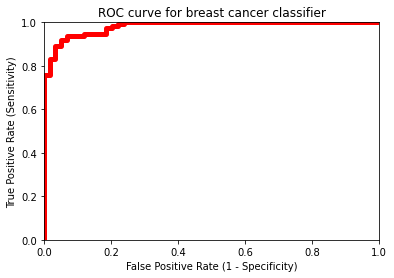

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for breast cancer classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr, tpr,color='red',lw=5)
plt.show()

## 1 - Specificity = fp/fp+tn 
## Sensitivity = tp/tp+fn

In [24]:
roc_auc_score(y_test,model.predict_proba(X_test)[:,1])

0.9821428571428571

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.72      0.98      0.83        59
           1       0.99      0.80      0.89       112

    accuracy                           0.87       171
   macro avg       0.86      0.89      0.86       171
weighted avg       0.90      0.87      0.87       171

